In [1]:
cd /home/ubuntu/DistMEC/

/home/ubuntu/DistMEC


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from classes.User import *
from classes.solver import *
from classes.Server import *
from classes.distributed_utils import *

import pickle
import copy

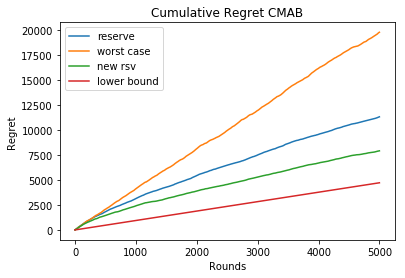

In [14]:
try:
    del b
except:
    pass

# Load pre-saved data to analyze
name = 'results/22_06_16_ceiling_20/regret_trial'
idx = 1
name = name + str(idx) + '.p'

with open(name, 'rb') as handle:
    b = pickle.load(handle)

# For each trial, calculate relevant values
relevant_dict = b
num_users = 10
T = b['reward_s'].shape[0]

pm_single = 0.05
pm = 1 - (1-pm_single)**(num_users)
po = 0.1

reg_threshold = 0.001
regret_temp = copy.deepcopy(b['regret_s'])
regret_temp[regret_temp <= 0] = 10
regret_temp[regret_temp <= reg_threshold] = 10
regret_temp[b['collision_s'] == 0] = 10
delta_min = min(regret_temp)

constant = delta_min/(po/pm + 1)
lower_bound = np.arange(T)*constant

plt.plot(np.cumsum(b['regret_res']), label = 'reserve')
plt.plot(np.cumsum(b['regret_w']), label = 'worst case')
plt.plot(np.cumsum(b['regret_s']), label = 'new rsv')
plt.plot(lower_bound, label = 'lower bound')

plt.title('Cumulative Regret CMAB')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()

In [19]:
lower_bound[-1]

4004.017201836182

In [20]:
pm

0.4012630607616213

In [21]:
constant

0.8009636330938551

In [22]:
delta_min

1.0005742405526075

In [4]:
b

{'reward_res': array([3.41535964, 3.50666743, 3.60340782, ..., 7.07102415, 4.30301972,
        7.59148051]),
 'reward_w': array([3.41535964, 3.50666743, 3.60340782, ..., 4.62769731, 5.56810231,
        7.59148051]),
 'reward_s': array([3.41535964, 3.50666743, 3.60340782, ..., 6.12238547, 6.02725543,
        7.59148051]),
 'regret_res': array([4.83373113, 4.75264313, 4.62368962, ..., 0.55065091, 3.352691  ,
        0.        ]),
 'regret_w': array([4.83373113, 4.75264313, 4.62368962, ..., 2.99397775, 2.08760841,
        0.        ]),
 'regret_s': array([4.83373113, 4.75264313, 4.62368962, ..., 1.49928959, 1.62845529,
        0.        ]),
 'collision_res': array([0., 0., 0., ..., 0., 4., 0.]),
 'collision_w': array([0., 0., 0., ..., 4., 3., 0.]),
 'collision_s': array([0., 0., 0., ..., 2., 2., 0.])}

In [11]:
delta_min

1.1883334069302283